[reference]

https://hiddenbeginner.github.io/tda/2020/08/25/Mapper1.html

### [TDA] 위상수학을 이용한 데이터 시각화 Mapper     

위상수학적 데이터 분석 (TDA) 대표 시각화 알고리즘 Mapper


Mapper는 고차원 데이터를 2차원으로 시각화할 수 있는 시각화 기법이다.    
고차원 데이터를 시각화하기 위해서는 PCA나 t-SNE 등의 차원축소 기법들이 많이 사용되지만,    
이들과 다르게 Mapper는 주어진 데이터를 그래프 자료구조로 변환하여 시각화한다.    
데이터를 그래프 자료구조로 변환하는 아이디어 뒤에 위상수학적 배경이 있기 때문에 Mapper는     
위상수학적 데이터 분석 (Topological data analysis; TDA) 분야로 구분된다.

TDA는 주어진 데이터가 어떠한 위상공간에서 샘플링되었다는 가정으로부터 시작된다.    
우리의 목표는 주어진 데이터로부터 해당 위상공간의 모양과 성질을 분석하는 것이다.     
통계학에서 표본 (데이터)으로부터 모집단 (위상공간)을 추정하는 것을 비유로 들 수 있다.    
하지만 데이터는 이산적 (discrete)이고 위상공간은 연속적 (continuous)인데    
어떻게 데이터로부터 위상공간의 특징을 알아낼 수 있을까?


어진 데이터로 위상공간을 근사하기 위해서 
우리는 먼저 데이터로부터 Simplicial complex (단체 복합체)라는 것을 만들어준다.
Simplicial complex는 simplex (단체)들을 모아놓은 것으로
0-simplex는 점, 1-simplex는 선, 2-simplex는 삼각형, 3-simplex는 정사면체, n-simplex는 꼭지점이 
n+1개인  n차원 다면체이다. 

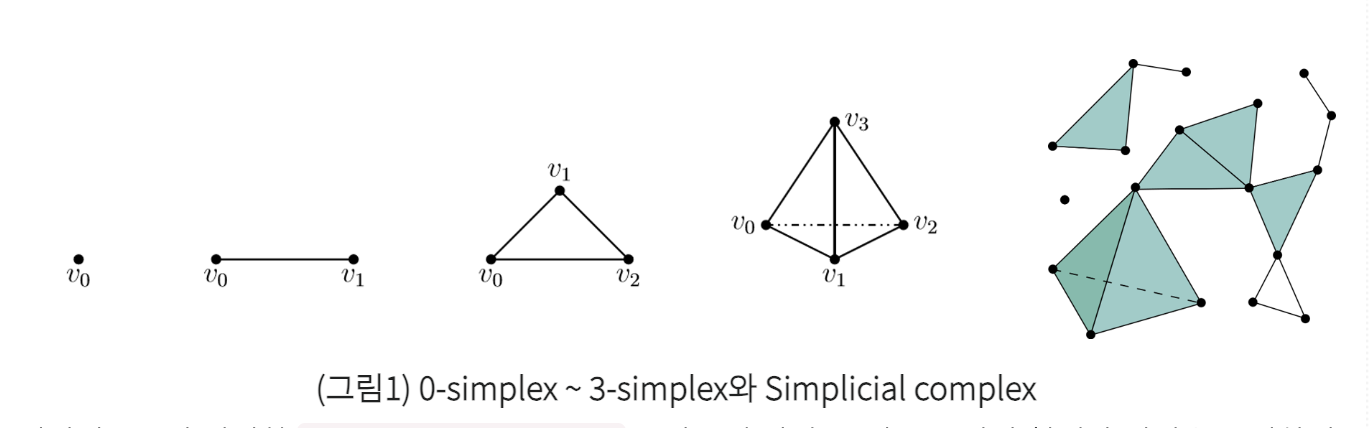

데이터로부터 적절한 simplicial complex를 만들게 되면,  
우리는 그것의 형태나 성질을 분석하여 데이터가 추출된 공간을 추정하게 된다.      
예를 들어, (그림1) 에 있는 simplicial complex는 다섯시 방향에 구멍 (hole)이 하나 있다.   
세 개의 1-simplex (선)이 만나 구멍이 있는 삼각형을 만든 것이다.     
이를 통해 데이터가 추출된 위상공간에는 구멍이 하나 있을 것이라고 예상하는 것이다.

***따라서 TDA에서는 Simplicial complex를 어떻게 만들 것인지가 가장 중요한 요소이다.***      
보통 Simplicial complex는 특정 거리 r을 설정하고   
두 데이터 사이의 거리가 r 미만이면 연결하는 방식으로 만드는 것이 일반적이다.   
Mapper에서는 이후 설명할 방법과 같이 그래프를 만들게 되는데,    
만들어진 그래프를 데이터의 Simplicial complex으로 생각하는 것이다.

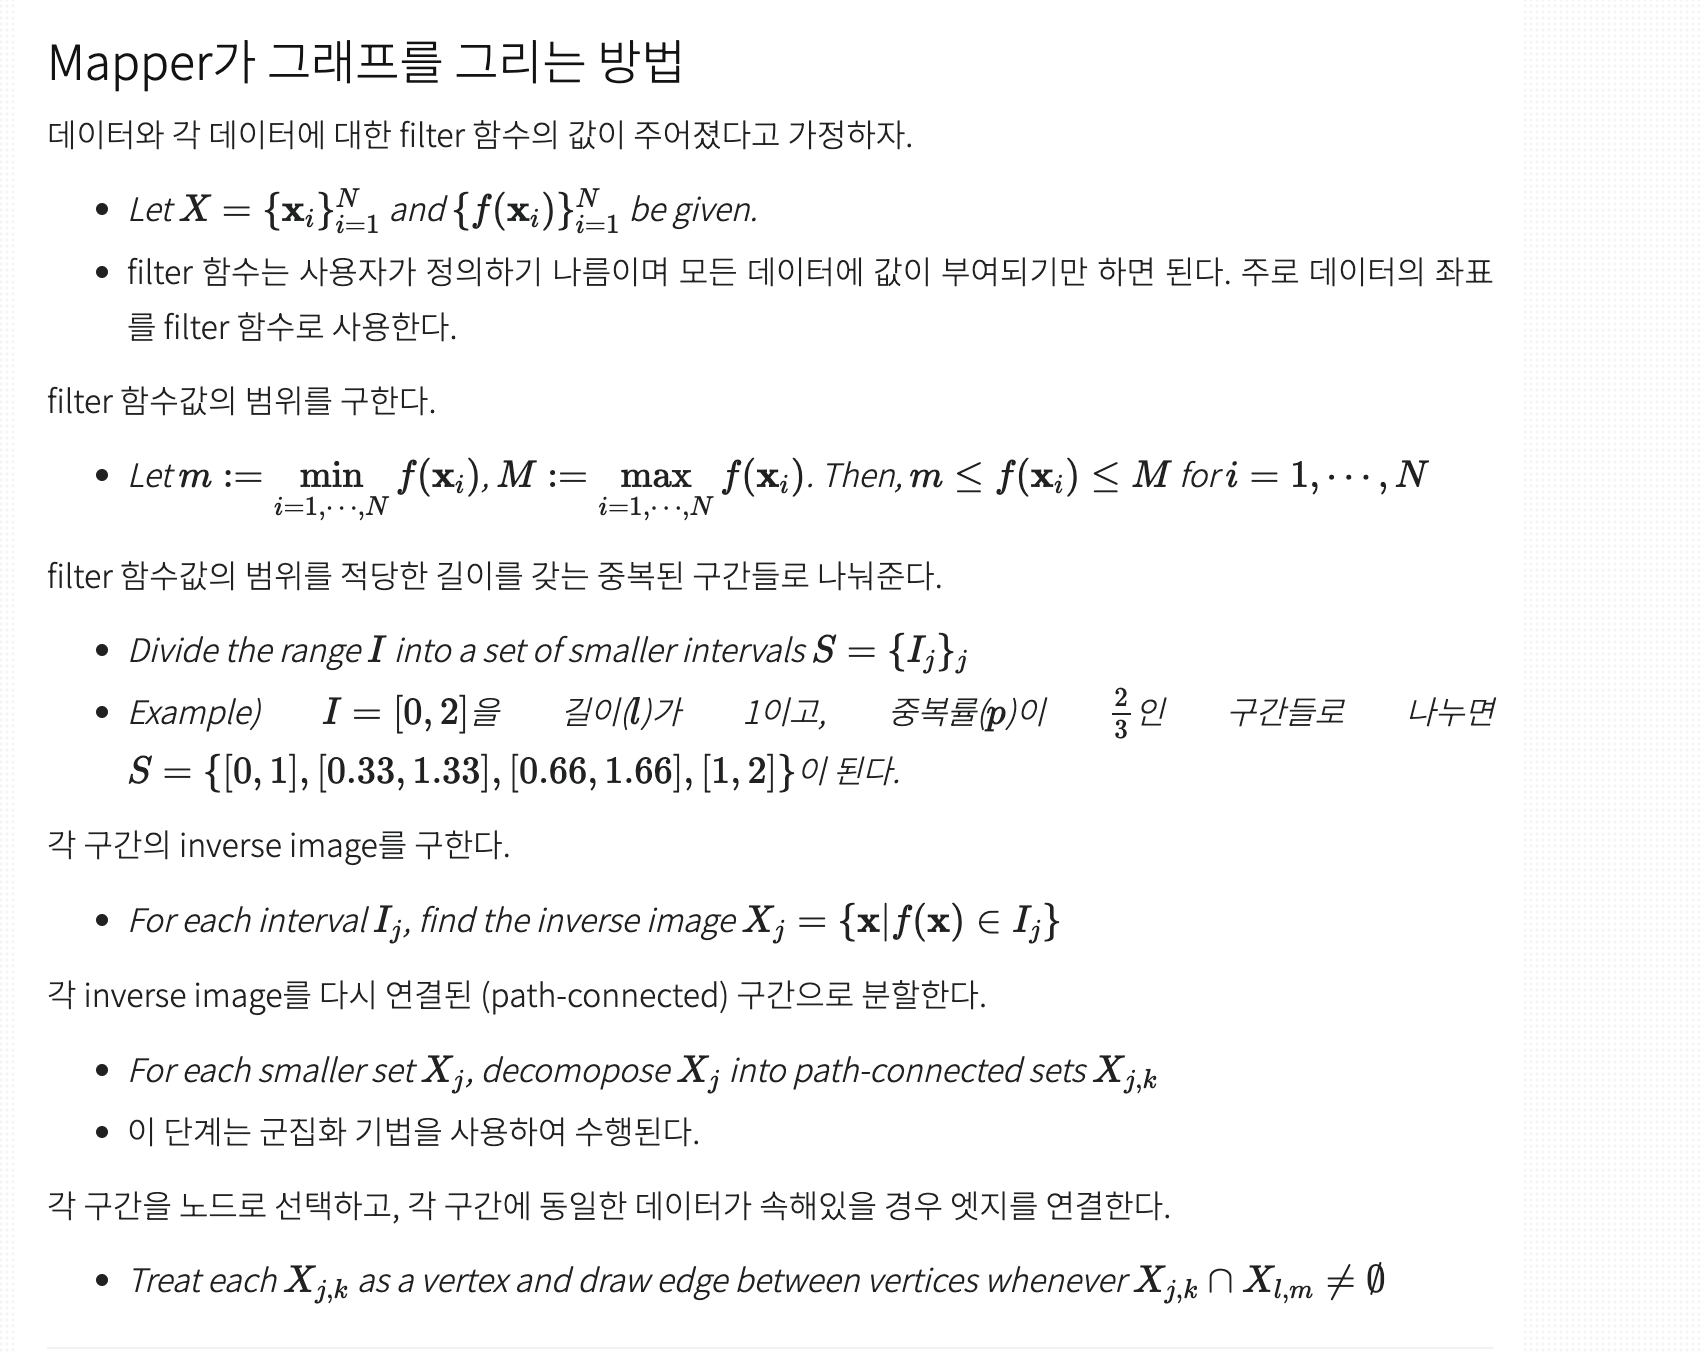

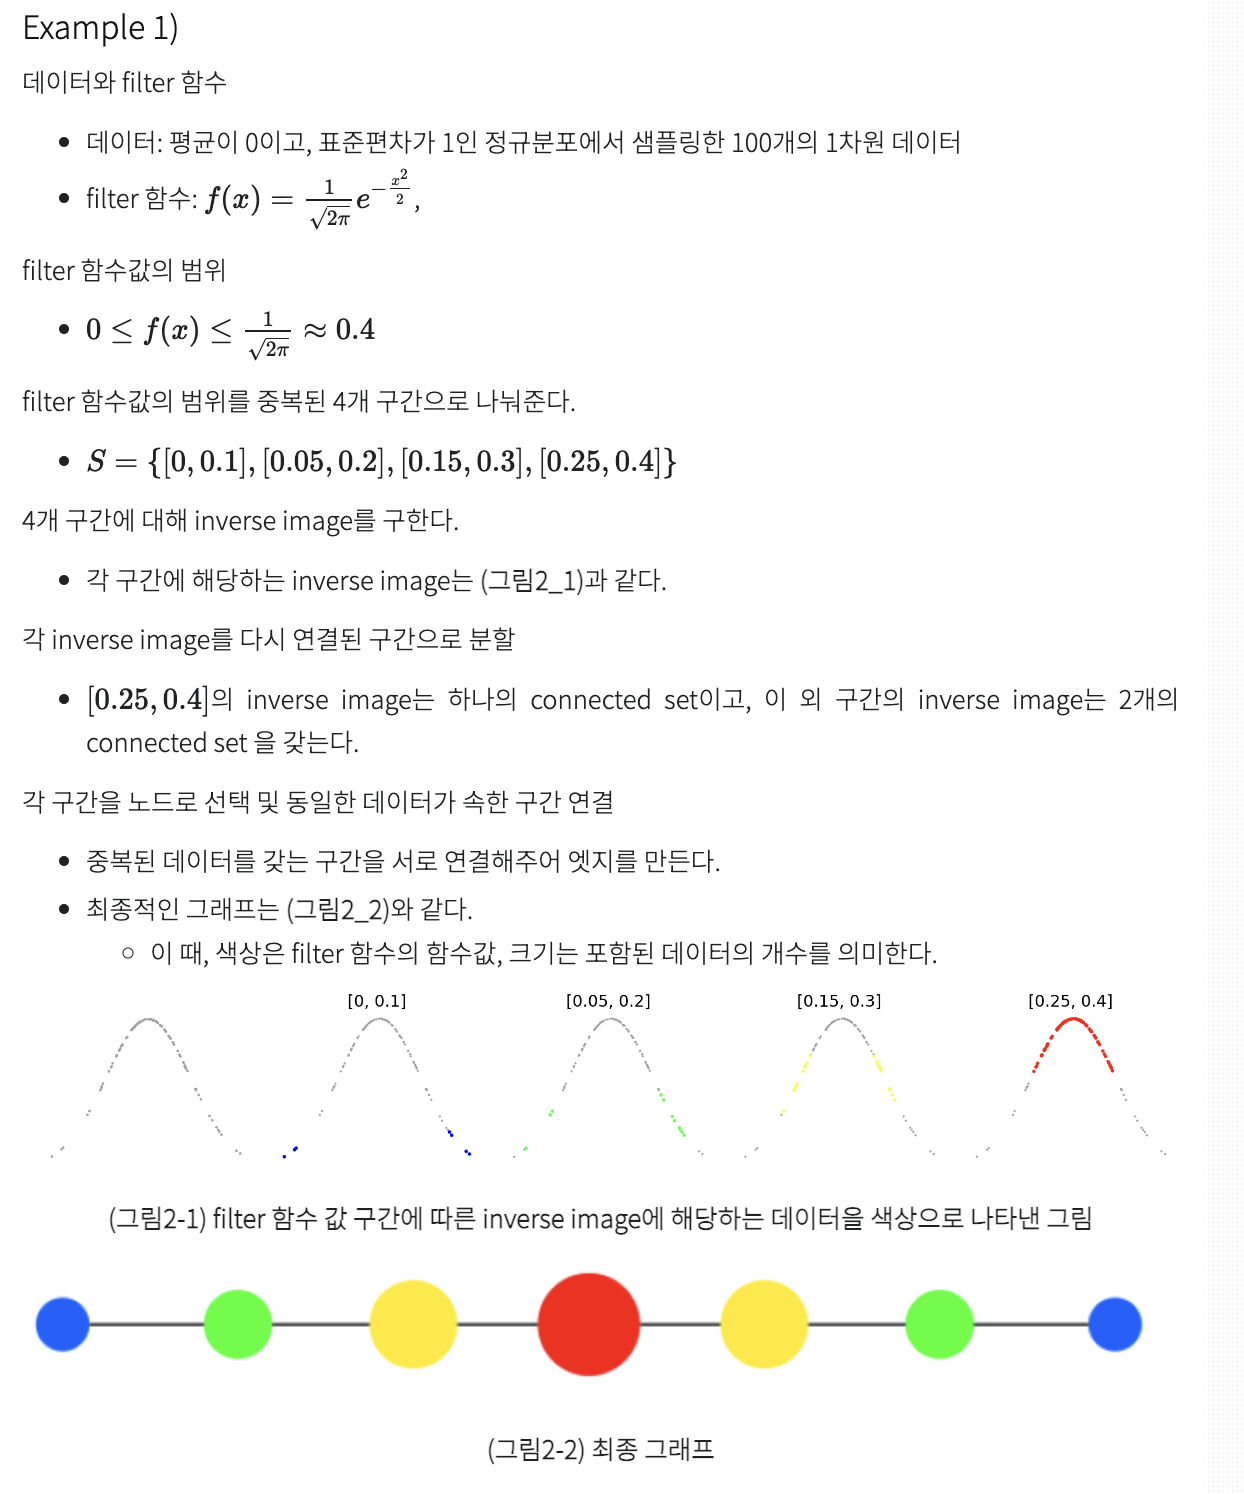

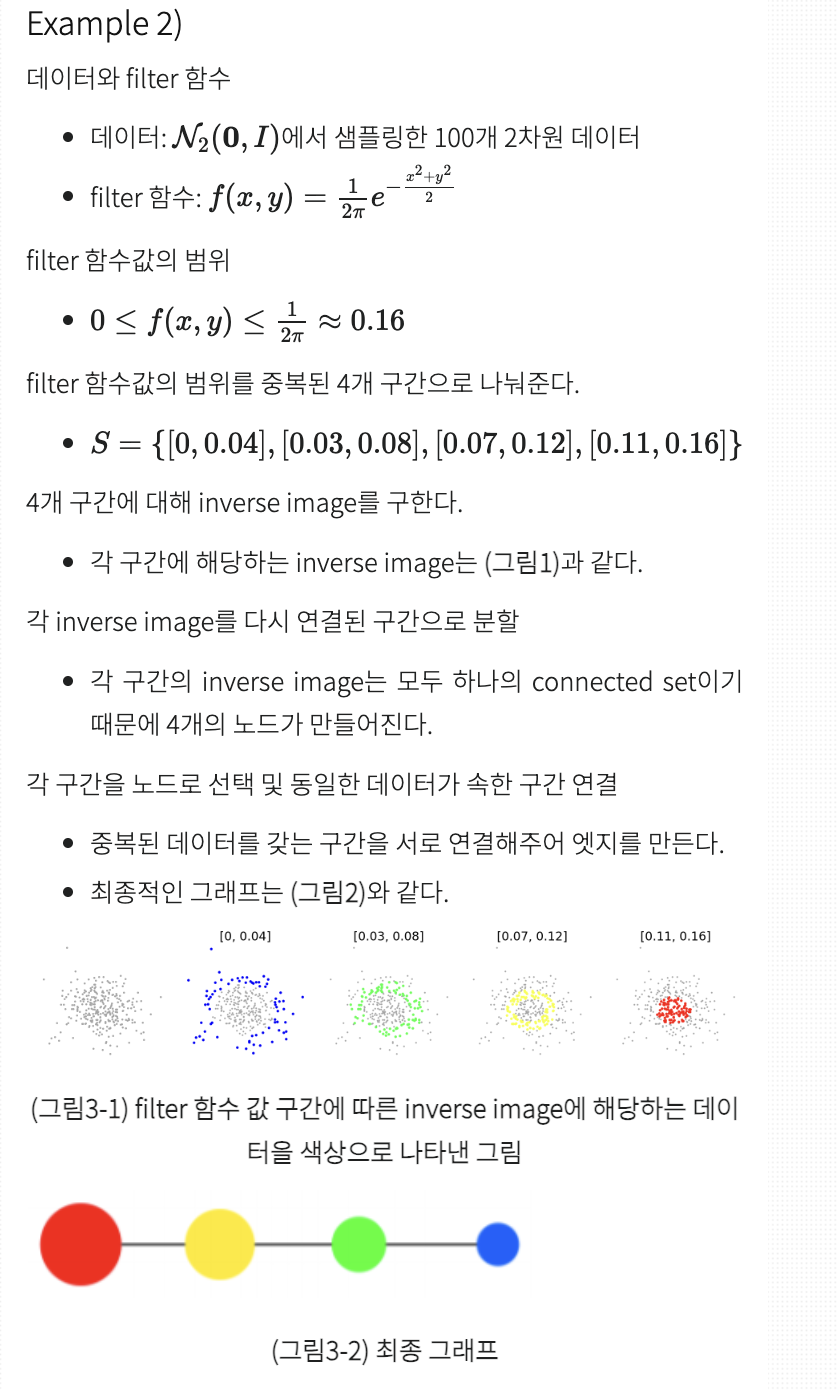

#### Giotto-tda를 사용한 Mapper   
Mapper를 사용할 수 있는 파이썬 패키지는 KeplerMapper와 Giotto-tda가 있다.   

- KeplerMapper는 굉장히 완성도가 있는 Mapper 패키지이다. 특히,   
  시각화 결과를 *.d3 형식으로도 제공하기 때문에 매우 근사한 interactive한 시각화가 가능하다.   
  Mapper만 사용할 경우 KeplerMapper 사용을 추천한다.    
- Giotto-tda의 결과물은 상대적으로 근사하지는 않지만,   
  Giotto-tda에서 제공하는 persistent homology 기법들과 Mapper를 결합할 수 있다는 장점이 있다.    


두 패키지 문법은 서로 유사하기 때문에 둘 다 사용해보고 자신에게 맞는 패키지를 선택하는 것을 권장한다.      
여기서는 giotto-tda를 사용하였다.    

##### Import Lib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# giotto-tda
import gtda.mapper

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

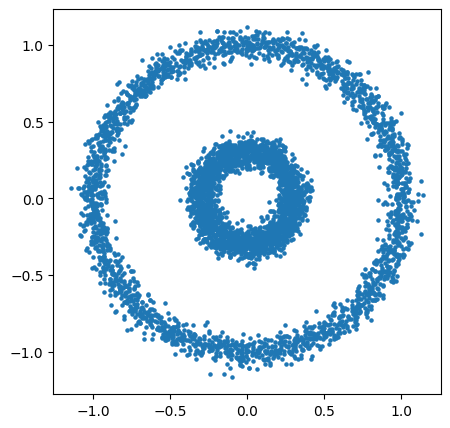

In [2]:
X, _ = make_circles(n_samples=5000, noise=0.05, factor=0.3, random_state=42)


plt.figure(figsize = (5,5))
plt.scatter(X[:,0], X[:,1], s=5)
plt.show()

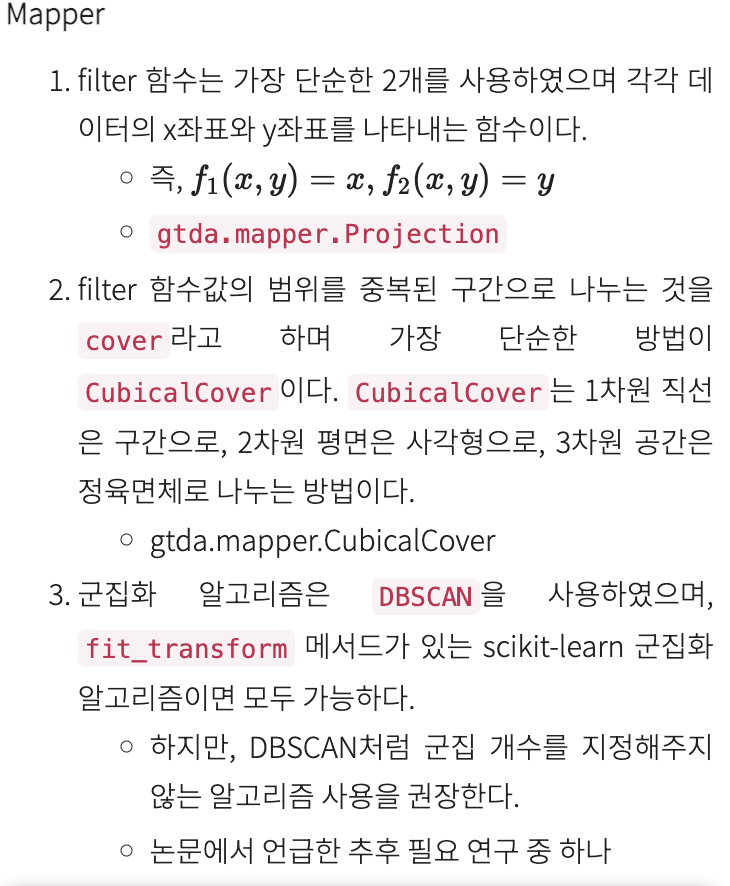

In [3]:
# 1. Filter function
filter_func = gtda.mapper.Projection(columns=[0, 1])

# 2. Cover
cover = gtda.mapper.CubicalCover(n_intervals=10, overlap_frac=0.3)

# 3. Clustering
clusterer = DBSCAN()

pipe = gtda.mapper.make_mapper_pipeline(filter_func=filter_func,
                                        cover=cover,
                                        clusterer=clusterer,
                                        verbose=False)

fig = gtda.mapper.plot_static_mapper_graph(pipe, X)
fig.show()

결과 그림은 원래 데이터셋이 큰 원과 작은 원을 갖고 있는 것을 포착할 수 있다.    
하지만 mapper는 결국 graph를 시각화하는 것이기 때문에 그림의 노드들은 위치 정보가 없다.     
따라서 큰 원과 작은 원의 위치 관계는 포착할 수 없다는 한계점이 있다.    

## reference  
- figure1_1: https://themodularperspective.com/2019/03/11/a-crash-course-in-homology-part-i-delta-complexes/
- figure1_2: https://en.wikipedia.org/wiki/Simplicial_complex
- figure2_2: https://research.math.osu.edu/tgda/mapperPBG.pdf
- 예제: https://giotto-ai.github.io/gtda-docs/latest/notebooks/mapper_quickstart.html

